# Project: PISA Dataset Analasis
## by Ali Rostami

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Here, we are going to analyze a data set from the PISA program which is an international assessment program of education and schooloing systems through different countries. Particularly, this data, which we analyze here, contian the assessments of performance of students in Math, Science, and Reading. 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling and Cleaning

The data is loaded.

In [298]:
df = pd.read_csv('pisa2012.csv', encoding="cp1252", sep=',')

Only necessary columns for our analysis are kept.

In [ ]:
df = df[['CNT', 'ST03Q02', 'ST04Q01', 'PV1MATH', 'PV2MATH',
         'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'STUDREL', 'TCHBEHFA',
         'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE',
         'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S', 'WEALTH', 'EXAPPLM', 'EXPUREM']]

Duplicated values and null values are dropped. 

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

There are 15 different columns for scores for math, reading, and science. Those columns are replaced with the average and the maximum of them. 

In [301]:
df['Avg Math Score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['Avg Reading Score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['avg Science Score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5

df['Max Math Score'] = df[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].max(axis=1)
df['Max Reading Score'] = df[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].max(axis=1)
df['Max Science Score'] = df[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].max(axis=1)

df.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)

The columns' titles are updated in favor of understandibility. 

In [ ]:
df.rename({'CNT': 'Country Code', 'ST03Q02': 'Birth Year', 'ST04Q01': 'Gender',
           'STUDREL': 'Teacher Student Relations', 'TCHBEHFA': 'Teacher Behavior',
           'COBN_S': 'Birth Country', 'COBN_M': 'Birth Country of Mother',
           'COBN_F': 'Birth Country of Father',
           'EXAPPLM': 'Experience with Applied Math in School',
           'EXPUREM': 'Experience with Pure Math in School',
           'avg Science Score': 'Average Science Score',
           'Avg Math Score': 'Average Math Score',
           'Avg Reading Score': 'Average Reading Score',
           'WEALTH': 'Wealth'}, axis='columns', inplace=True)

The country names and their related states are replaced with a unique name in all columns. Also, the country names which are not understandable are replaced with the value "Unknown". There are two functions "replace_names_with_correct_ones" and "correct_country_names". In the first function, we correct those names which are supposed to be replaces completely with a new ones. In the second function, we correct the country names which are supposed to be checked if they are partially contain something to return a relevant result.

In [ ]:
# This function replaces different spelled names of countries with a unique name
def replace_names_with_correct_ones():
    df = df.replace(['Connecticut (USA)', 'Florida (USA)', 'Massachusetts (USA)', 'United States of America'], 'USA')
    df = df.replace(['Perm(Russian)', 'Russian Federation', 'Perm(Russian Federation)'], 'Russia')
    df = df.replace('United Kingdom', 'UK')
    df = df.replace('United Arab Emirates', 'UAE')
    df = df.replace(['Hong Kong-China', 'China-Shanghai'], 'China')
    df = df.replace('Chinese Taipei', 'Taiwan')
    df = df.replace('United States', 'USA')
    df = df.replace('Korea, Republic of', 'Korea')
    df = df.replace('Czechia', 'Czech')
    df = df.replace('Czech Republic', 'Czech')
    df = df.replace('Hong Kong', 'China')
    df = df.replace('Macao-China', 'China')
    df = df.replace('Slovak Republic', 'Slovakia')
    df = df.replace('Macao', 'China')
    df = df.replace('Bosnia and Herzegovina', 'Bosnia')


# This function will correct the naems of countries based on different observations:
# - Some countries are spelled differently
# - Sometimes, only the abbreviation of a country is used or sometimes the whole name
# - There are some abbreviations which are not correct. 
def correct_country_names(country):
    country = country.strip()
    lower_country = country.lower()
    if country.find('United Kingdom') != -1:
        return 'UK'
    elif lower_country.find('another country (') != -1:
        if country[17:20] == 'QUK':
            return 'Unknown'
        if country[17:20] == 'QSC':
            return 'Unknown'
        if country[17:20] == 'QCN':
            return 'China'
        if country[17:20] == 'TAP':
            return 'Unknown'
        return cnt[country[17:20]]
    elif country.find('Another American country [URY]') != -1:
        return 'Uruguay'
    elif country.find('Another country within the European Union (ITA)') != -1:
        return 'Italy'
    elif country.find('Another province in mainland China (QCN)') != -1:
        return 'China'
    elif country.find('ESP') != -1:
        return 'Spain'
    elif country.find('United States') != -1:
        return 'USA'
    elif country.find('United States of America') != -1:
        return 'USA'
    elif country.find('PRT') != -1:
        return 'Portugal'
    elif country.find('ARE') != -1:
        return cnt['ARE']
    elif country.find('An Eastern European country') != -1:
        return 'Unknown'
    elif country.find('A European country') != -1:
        return 'Unknown'
    elif country.find('An Eastern European country outside the EU') != -1:
        return 'Unknown'
    elif country.find('A Sub-Saharan country (Africa excl. Maghreb)') != -1:
        return 'Unknown'
    elif country.find('Serbia, Montenegro and Kosovo') != -1:
        return 'Serbia'
    elif country.find('Slovak Republic') != -1:
        return 'Slovakia'
    elif country.find('South, Latin  and Central America') != -1:
        return 'Unknown'
    elif country.find('African country with Portuguese as the official') != -1:
        return 'Unknown'
    elif country.find('LUX') != -1:
        return cnt['LUX']
    elif country.find('QSC') != -1:
        return 'Unknown'
    elif country.find('NLD') != -1:
        return 'Unknown'
    elif country.find('Middle Eastern country') != -1:
        return 'Unknown'
    elif country.find('Hong Kong, Macau') != -1:
        return 'China'
    elif country.find('Macao') != -1:
        return 'China'
    elif country.find('Hong Kong') != -1:
        return 'China'
    elif country.find('Invalid') != -1:
        return 'Unknown'
    else:
        if country.find('China') != -1:
            return 'China'
        if country.find('United States') != -1:
            return 'USA'
        if len(country) > 30:
            return 'Unknown'
        if country == 'Africa':
            return 'Unknown'
        if country == 'Czechia':
            return 'Czech Republic'
        if country == 'Hong Kong':
            return 'China'
        if country == 'Missing':
            return 'Unknown'
        if country == 'Chinese Taipei':
            return 'Taiwan'
        if country == 'United Arab Emirates':
            return 'UAE'
        if country == 'Russian Federation':
            return 'Russia'
        if country == 'Republic of Korea':
            return 'Korea'
        if country == 'Occupied Palestinian Territory':
            return 'Unknown'
        if country == 'Iran, Islamic Republic of':
            return 'Unknown'
        if country == 'Netherlands Antilles':
            return 'Antilles'
        return country

# apply the defined function for all names of countries
df['Birth Country'] = df['Birth Country'].apply(correct_country_names)
df['Birth Country of Mother'] = df['Birth Country of Mother'].apply(correct_country_names)
df['Birth Country of Father'] = df['Birth Country of Father'].apply(correct_country_names)
replace_names_with_correct_ones()

Finally, we write the clean data into a file.

In [ ]:
df.to_csv('pisa_data_clean.csv')

<a id='eda'></a>
## Exploratory Data Analysis

We have already cleaned the data and removed several unnecessary and null data in the previous section. In the followings, we first import the important libraries, read the data, and have a general look at data.

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

df = pd.read_csv('pisa_data_clean.csv')

The research question that we are going to answer is if how the the birth countries of the student and their parents effect the scores. For this purpose, we will follow the following exploratory analysis. 

First, we explore the data using different visualization for a better understanding of the data and the relations in it. First we look how is the distribution of the number of assessed students over the countries. In the following bar chart, we can see that the most of data is from Mexico, Italy, Spain, and Canada. Also, we can see that there are only a few data from Lichtenstein and Iceland. 

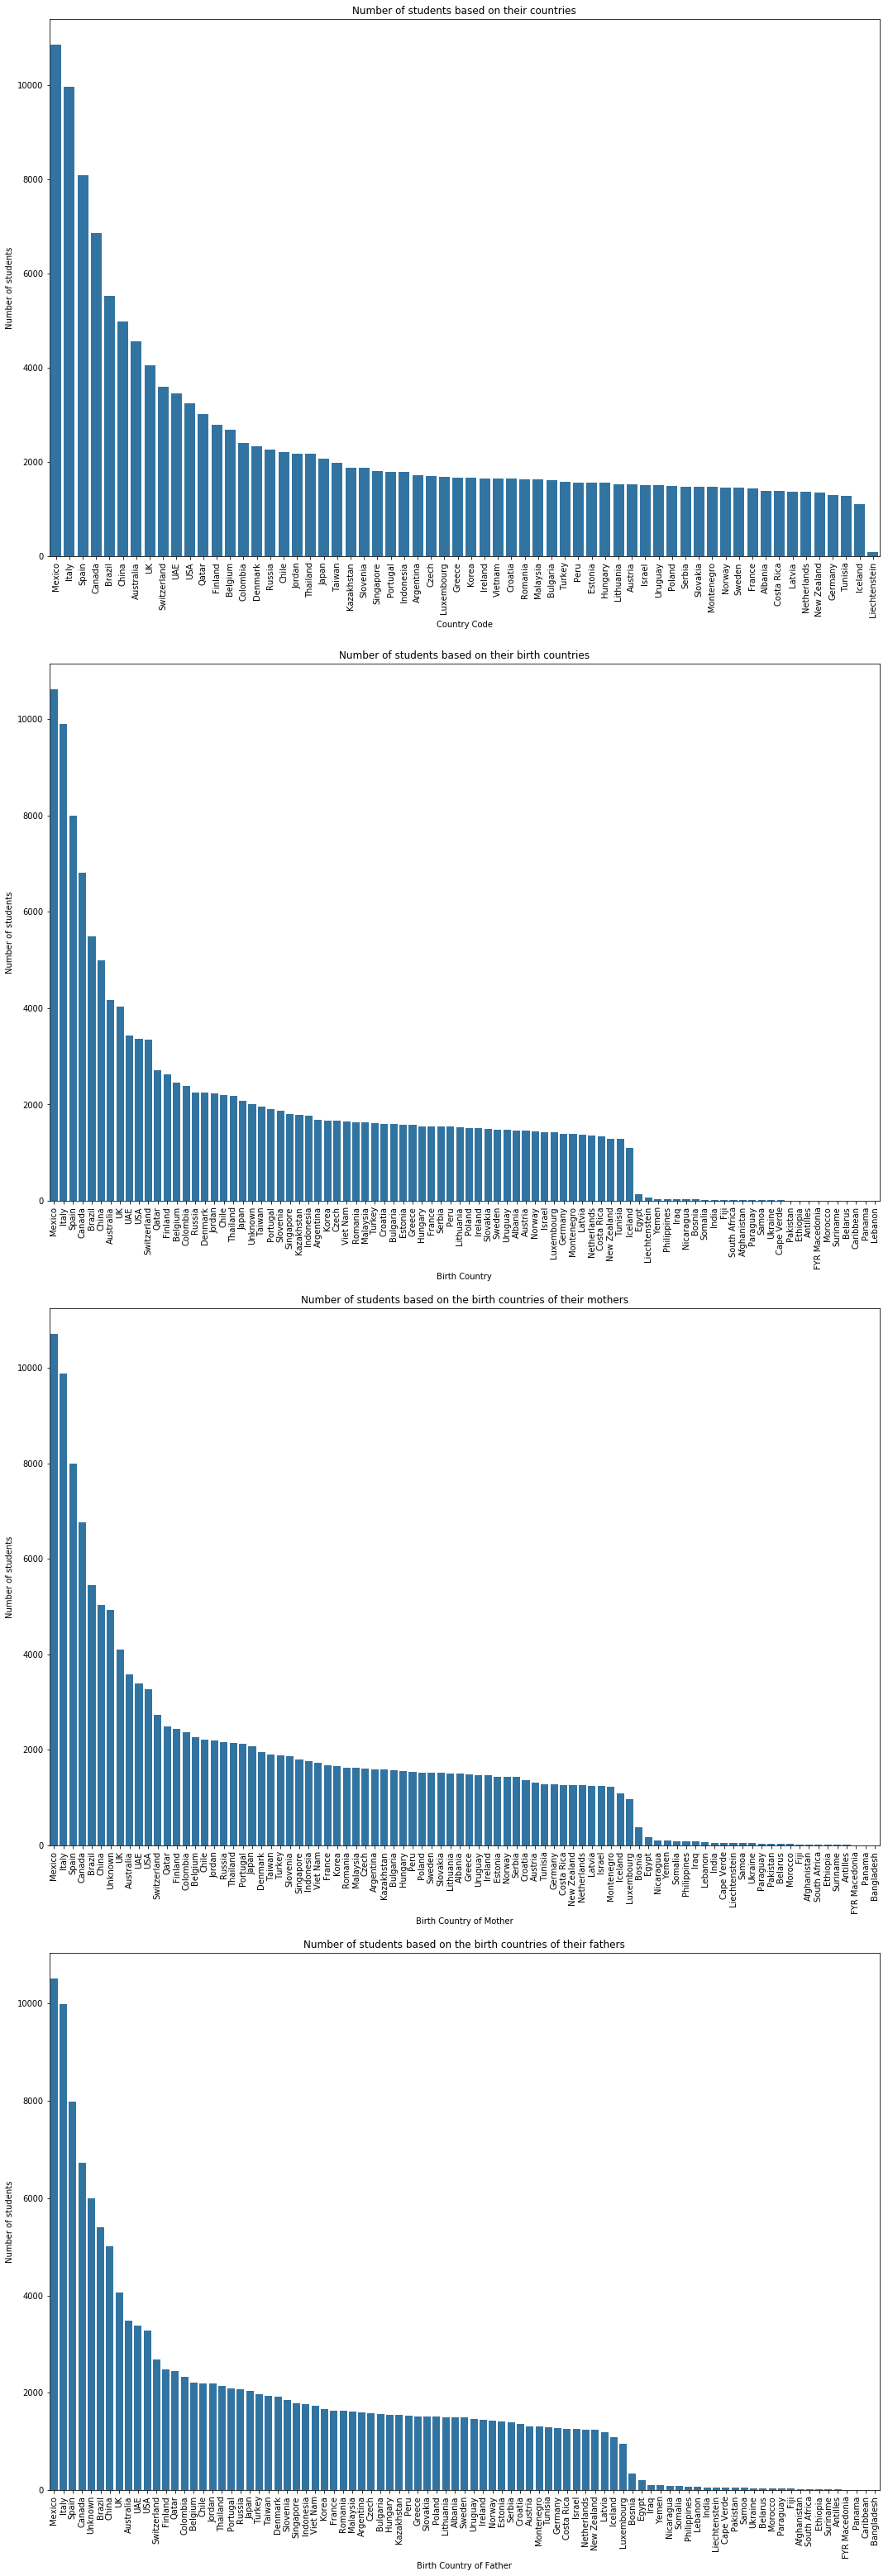

In [3]:
plt.figure(figsize = [18, 55])

plt.subplot(4, 1, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Country Code', color = base_color, order=df['Country Code'].value_counts().index)
plt.title('Number of students based on their countries')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

plt.subplot(4, 1, 2)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Birth Country', color = base_color, order=df['Birth Country'].value_counts().index)
plt.title('Number of students based on their birth countries')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

plt.subplot(4, 1, 3)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Birth Country of Mother', color = base_color, order=df['Birth Country of Mother'].value_counts().index)
plt.title('Number of students based on the birth countries of their mothers')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

plt.subplot(4, 1, 4)
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Birth Country of Father', color = base_color, order=df['Birth Country of Father'].value_counts().index)
plt.title('Number of students based on the birth countries of their fathers')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

Another factor is the background of students wether their parents have similar birthplaces as them. Here, we compute a number which shows this factor. This number can be 1 if the student and their parents are born all in the same country, 2 if one of the parents is born in a different country than the student. Finally, the numnber 3 shows that the parents and the student are all born in different countries. In the followings, first figure shows the distribution of this factor. So, most of the students are born in the same country as their parents.    

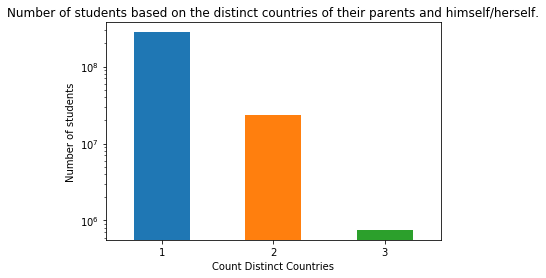

In [4]:
# The three country names of mother, father, and the student are merged to one string for the later process
df['Merged Birth Countries'] = df['Birth Country of Mother'] + "," +  df['Birth Country of Father'] + "," + df['Birth Country'];

# Here, we compute a count which shows the different countries for monter, father, and the student.
# So, 1 means all three are born in the same country
# 2 means two of them are born in different countries
# 3 means all of them are birn in different country
def count_distinct_countries(str):
    s = set()
    for t in str.split(","):
        s.add(t)
    return len(s)

# we apply the previously defined function to the merged names of countries to compute the representing number of 
# different birth countries 
df['Count Distinct Countries'] = df['Merged Birth Countries'].apply(count_distinct_countries);
res = df.groupby('Count Distinct Countries').sum()['Birth Year']
res.plot.bar(logy=True)
plt.title('Number of students based on the distinct countries of their parents and himself/herself.')
plt.ylabel('Number of students');
plt.xticks(rotation='horizontal');

<Figure size 3600x1440 with 0 Axes>

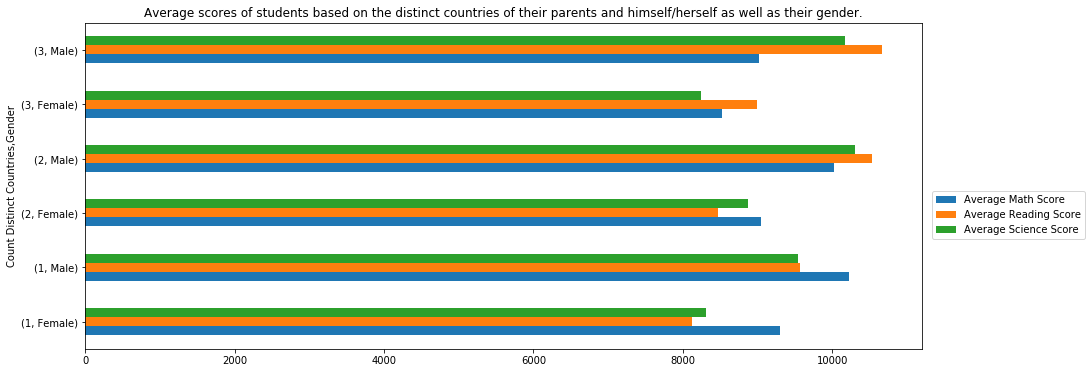

In [5]:
plt.figure(figsize = [50, 20])
res = df.groupby(['Count Distinct Countries','Gender']).var()[['Average Math Score', 'Average Reading Score', 'Average Science Score']]
ax = res.plot.barh(figsize=(15,6));
ax.legend(bbox_to_anchor=(1.2, 0.5))
# plt.subplots_adjust(top = 1.4)
plt.title('Average scores of students based on the distinct countries of their parents and himself/herself as well as their gender.')
plt.xticks(rotation='horizontal');

Now, we can look at the distribution and the correlations of the scores of Math, Reading, and Science considering all students from all countries. Basically, looking at the following figure, we can say that the scores are highly correlated. So, we might just have a focus on one of the scores like mathematics. 

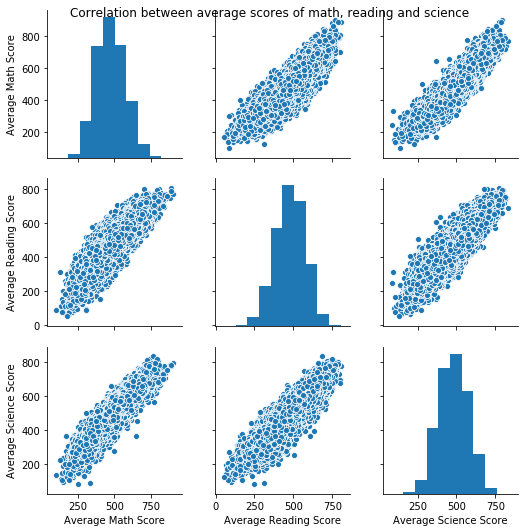

In [6]:
pair_plot = sb.pairplot(data = df, vars=["Average Math Score", "Average Reading Score", "Average Science Score"]);
pair_plot.fig.suptitle("Correlation between average scores of math, reading and science");

Here, we can also measure how different the scores of male and female students are. Again, the results are in general similar although the reading score of female students is higher a little bit. 

Text(0.5,1,'Average scores of students based on the distinct countries of their parents and himself/herself as well as their gender.')

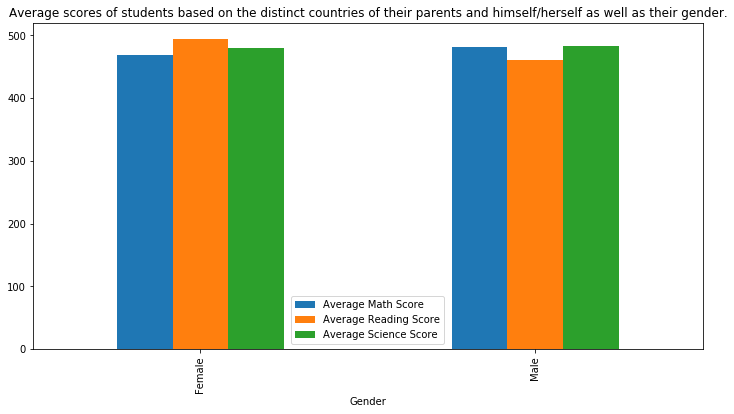

In [7]:
res = df.groupby(['Gender']).mean()[['Average Math Score', 'Average Reading Score', 'Average Science Score']]
ax = res.plot.bar(figsize=(12,6));
plt.title('Average scores of students based on the distinct countries of their parents and himself/herself as well as their gender.')
# plt.xticks(rotation='horizontal');

Here, we want to see if the different birth places of parents has any high effects on the scores. As it can be seen, generally, we can not see any high effects. A tiny differences can be seen in math and reading scores of the students with different backgrounds which are higher.   

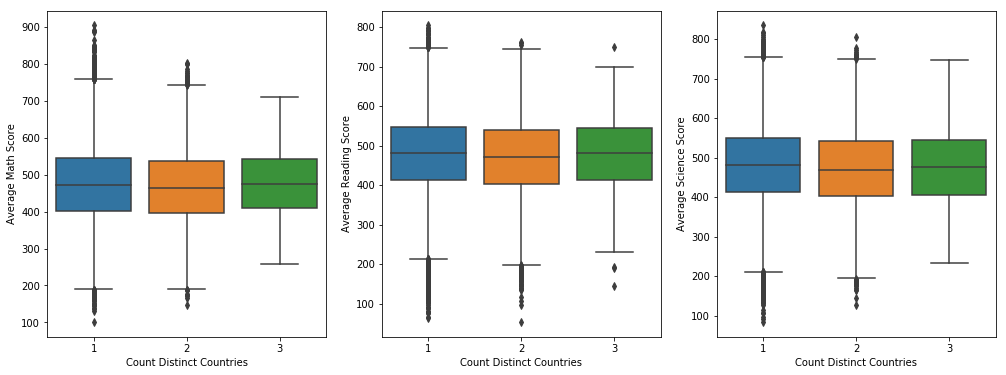

In [8]:
plt.figure(figsize = [17, 6])
plt.subplot(1, 3, 1)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Average Math Score']);
plt.subplot(1, 3, 2)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Average Reading Score']);
plt.subplot(1, 3, 3)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Average Science Score']);

Another intersting factor is the distribution of different scores based on countries. An interesting observation is that the east-asian countries, like China, South Korea, Taiwan, Japan, have higher score in math in average. On the other hand, many south and central american countries, like Costo Rica, Colombia, Uruguay, Mexico, have low math scores in average.

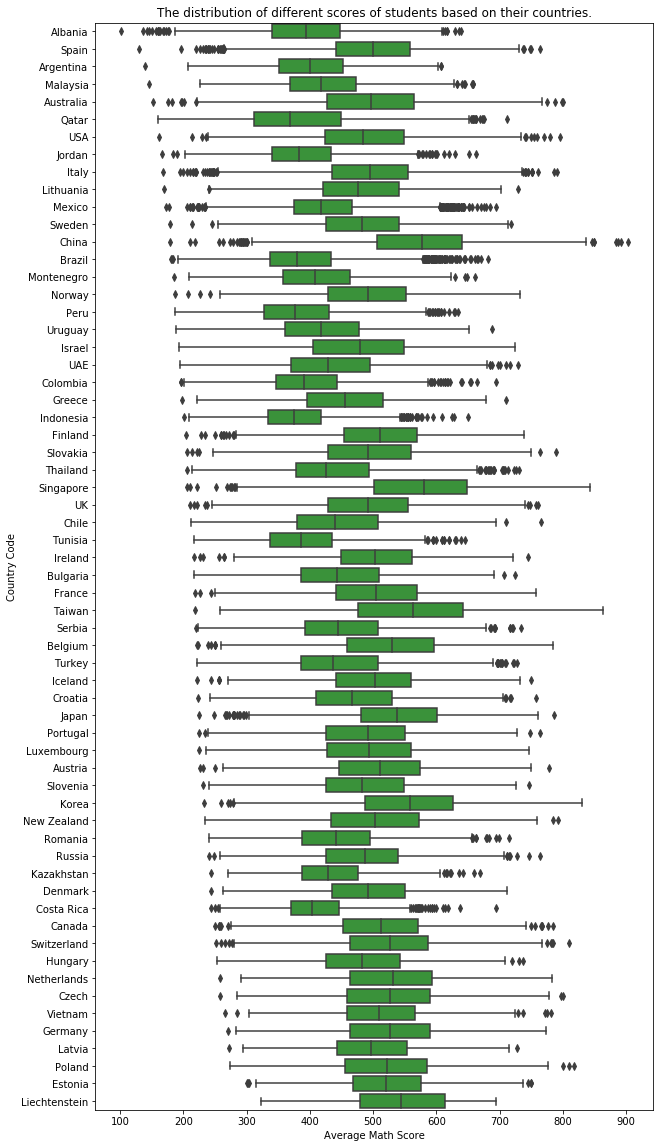

In [9]:
plt.figure(figsize = [10, 20])
df_sorted = df.sort_values(by='Average Math Score')
sb.boxplot(x = df_sorted['Average Math Score'], y = df_sorted['Country Code'], color=sb.color_palette()[2]);
plt.title('The distribution of different scores of students based on their countries.');

Another factor to look at is the teacher behavior based on the conutries. In general, the data seems not so liable since we can not see major differences. Although the results shows the Korea has the wrost teacher behavior, the scores from Korea is not the wrost ones. 

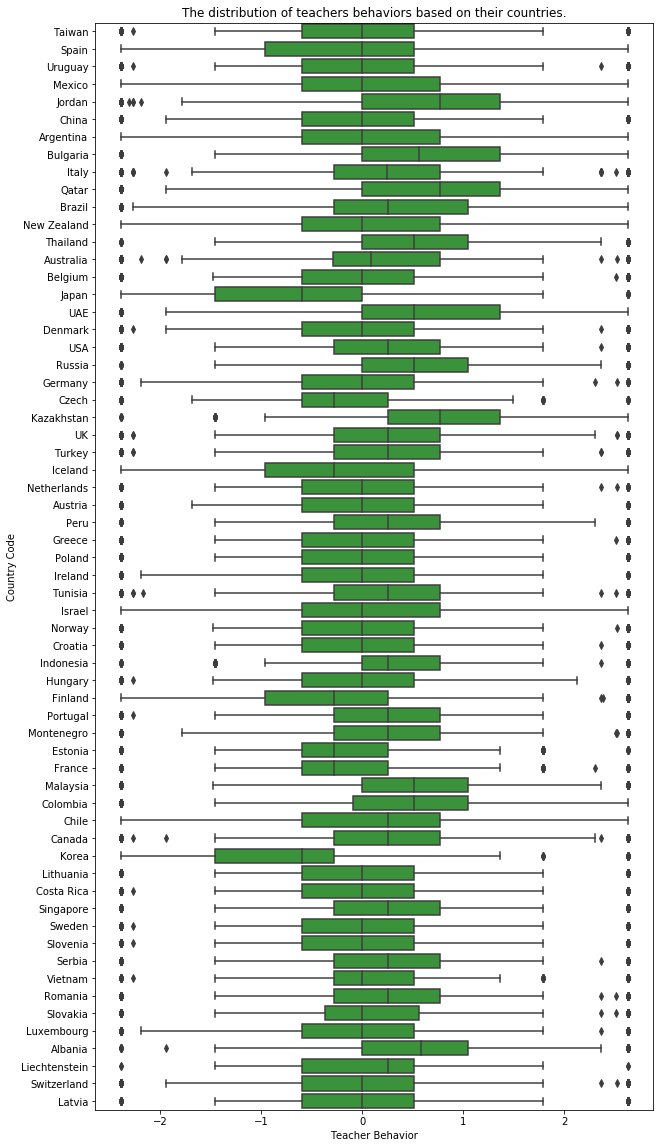

In [10]:
plt.figure(figsize = [10, 20])
df_sorted = df.sort_values(by='Teacher Behavior')
sb.boxplot(x = df_sorted['Teacher Behavior'], y = df_sorted['Country Code'], color=sb.color_palette()[2]);
plt.title('The distribution of teachers behaviors based on their countries.');

<a id='conclusions'></a>
## Conclusions
We could infer how students are performing in math based on their birth countries and their parents' birth countries as well as their gender. We have measured this performance based on three scores of math, reading, and science. Also, we finally shortly look at the teach behavior distribution through the countries. 



In [381]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0